In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df = df.drop(['free sulfur dioxide','fixed acidity'],axis=1)

In [7]:
data = df.values
df.columns[:-1]

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [8]:
X = data[:, :-1]
y = data[:, -1]
X_columns = df.columns[:-1]
y_columns = df.columns[-1]

In [9]:
X_columns
y_columns

'quality'

In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
from collections import Counter

In [12]:
oversample = SMOTE()

In [13]:
X, y = oversample.fit_sample(X, y)

In [14]:
X_sampled = pd.DataFrame(X, columns=X_columns)

In [15]:
X_sampled

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...
4081,0.321285,0.467766,2.445256,0.077872,19.483211,0.995616,3.181927,0.841956,11.593577
4082,0.569075,0.593613,4.521004,0.079634,21.121862,0.997934,3.222122,0.704853,12.954409
4083,0.472467,0.593502,3.779315,0.077257,17.360749,0.997926,3.181751,0.668143,12.088599
4084,0.366687,0.376563,2.710001,0.065763,32.550007,0.995865,3.283250,0.804375,11.965626


In [16]:
y_sampled = pd.DataFrame(y, columns=[y_columns])

In [17]:
y_sampled

,quality
0,5.0
1,5.0
2,5.0
3,6.0
4,5.0
...,...
4081,8.0
4082,8.0
4083,8.0
4084,8.0


In [23]:
df_sampled = pd.concat([X_sampled,y_sampled],axis=1)

In [24]:
df_sampled

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000,5.0
1,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000,5.0
2,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000,5.0
3,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000,6.0
4,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000,5.0
...,...,...,...,...,...,...,...,...,...,...
4081,0.321285,0.467766,2.445256,0.077872,19.483211,0.995616,3.181927,0.841956,11.593577,8.0
4082,0.569075,0.593613,4.521004,0.079634,21.121862,0.997934,3.222122,0.704853,12.954409,8.0
4083,0.472467,0.593502,3.779315,0.077257,17.360749,0.997926,3.181751,0.668143,12.088599,8.0
4084,0.366687,0.376563,2.710001,0.065763,32.550007,0.995865,3.283250,0.804375,11.965626,8.0


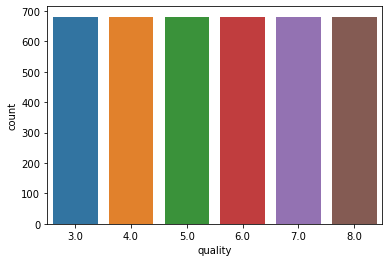

In [25]:
sns.countplot(x='quality',data=df_sampled)

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [27]:
X = df_sampled.drop('quality',axis=1)
y = df_sampled['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [28]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)
preds = logmodel.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(confusion_matrix(y_test,preds))
print("\n")
print(classification_report(y_test,preds))

[[137  13   9   6   0   0]
 [ 35  66  50  18   3   1]
 [ 17  15  92  26   7   4]
 [  7  19  41  46  35  18]
 [  2   7   5  25  67  71]
 [  0   0   0   0  36 144]]


              precision    recall  f1-score   support

         3.0       0.69      0.83      0.75       165
         4.0       0.55      0.38      0.45       173
         5.0       0.47      0.57      0.51       161
         6.0       0.38      0.28      0.32       166
         7.0       0.45      0.38      0.41       177
         8.0       0.61      0.80      0.69       180

    accuracy                           0.54      1022
   macro avg       0.52      0.54      0.52      1022
weighted avg       0.53      0.54      0.52      1022



In [34]:
y_test.shape

(1022,)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_preds))
print("\n")
print(classification_report(y_test,rfc_preds))

[[165   0   0   0   0   0]
 [  1 168   3   1   0   0]
 [  5   8 121  24   3   0]
 [  3   7  28 103  21   4]
 [  0   1   1   7 164   4]
 [  0   0   0   0   2 178]]


              precision    recall  f1-score   support

         3.0       0.95      1.00      0.97       165
         4.0       0.91      0.97      0.94       173
         5.0       0.79      0.75      0.77       161
         6.0       0.76      0.62      0.68       166
         7.0       0.86      0.93      0.89       177
         8.0       0.96      0.99      0.97       180

    accuracy                           0.88      1022
   macro avg       0.87      0.88      0.87      1022
weighted avg       0.87      0.88      0.88      1022



In [37]:
from sklearn.svm import SVC

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=   1.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   1.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   1.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   1.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   2.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   1.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   1.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   1.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total=   1.4s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   1.1s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   1.2s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   1.1s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   1.1s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   1.1s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.8s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.6min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [39]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print("\n")
print(classification_report(y_test,grid_predictions))

[[165   0   0   0   0   0]
 [  4 157   8   4   0   0]
 [  6  26  85  44   0   0]
 [  4  19  30  73  32   8]
 [  2   3   2  26 121  23]
 [  0   0   0   0   0 180]]


              precision    recall  f1-score   support

         3.0       0.91      1.00      0.95       165
         4.0       0.77      0.91      0.83       173
         5.0       0.68      0.53      0.59       161
         6.0       0.50      0.44      0.47       166
         7.0       0.79      0.68      0.73       177
         8.0       0.85      1.00      0.92       180

    accuracy                           0.76      1022
   macro avg       0.75      0.76      0.75      1022
weighted avg       0.75      0.76      0.75      1022

